In [1]:
import pandas as pd

import datetime
import time
import calendar

%matplotlib inline

import matplotlib.pyplot as plt

import re

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df_bo = pd.read_csv("obama_press_release_w_text_all.csv")
df_dt = pd.read_csv("trump_w_content.csv")

In [4]:
# df_bo.head()

In [5]:
df_bo["datetime"] = pd.to_datetime(df_bo["time"], format = "%B %d, %Y")
df_bo.head()

,time,title,url,weekday,content,datetime
0,"January 16, 2017",President Obama Announces More Key Administrat...,https://obamawhitehouse.archives.gov//the-pres...,Monday,"[[<p>\r\r\n\tWASHINGTON, DC – Today, President...",2017-01-16
1,"January 16, 2017",Readout of Vice President Biden’s Meeting with...,https://obamawhitehouse.archives.gov//the-pres...,Monday,[[<p>\r\r\n\tVice President Biden met with Pri...,2017-01-16
2,"January 16, 2017",Statement by NSC Spokesperson Ned Price on Dep...,https://obamawhitehouse.archives.gov//the-pres...,Monday,"[[<p>\r\r\n<span style=""font-family:book antiq...",2017-01-16
3,"January 16, 2017",Statement by the President on the One-Year Ann...,https://obamawhitehouse.archives.gov//the-pres...,Monday,"[[<p>\r\r\n<span style=""font-family:book antiq...",2017-01-16
4,"January 14, 2017",Readout of the Principal-Level Transition Exer...,https://obamawhitehouse.archives.gov//the-pres...,Saturday,[[<p>\r\r\n\tThe White House on Friday afterno...,2017-01-14


In [6]:
df_bo.shape

(11758, 6)

In [7]:
# df_dt.head()

In [8]:
df_dt["datetime"] = pd.to_datetime(df_dt["time"], format = "%b %d, %Y")
df_dt.head()

,issue,time,title,type,url,weekday,content,datetime
0,LAND & AGRICULTURE,"Jul 6, 2018",President Donald J. Trump Approves Texas Disas...,STATEMENTS & RELEASES,https://www.whitehouse.gov/briefings-statement...,Friday,"['Today, President Donald J. Trump declared th...",2018-07-06
1,IMMIGRATION,"Jul 6, 2018",Remarks by Vice President Pence at U.S. Immigr...,REMARKS,https://www.whitehouse.gov/briefings-statement...,Friday,['U.S. Immigration And Customs Enforcement Hea...,2018-07-06
2,ECONOMY & JOBS,"Jul 6, 2018","Jobs, Jobs, Jobs: The American Economy Is Booming",NEWS CLIPS,https://www.whitehouse.gov/briefings-statement...,Friday,['The United States economy added a healthy 21...,2018-07-06
3,INFRASTRUCTURE & TECHNOLOGY,"Jul 6, 2018",Presidential Message on National Air Traffic C...,STATEMENTS & RELEASES,https://www.whitehouse.gov/briefings-statement...,Friday,"['On National Air Traffic Control Day, we reco...",2018-07-06
4,FOREIGN POLICY,"Jul 5, 2018",Readout of the Vice President’s Call with Mace...,STATEMENTS & RELEASES,https://www.whitehouse.gov/briefings-statement...,Thursday,['Vice President Mike Pence spoke with Prime M...,2018-07-05


In [9]:
df_bo.weekday.value_counts()

Thursday     2387
Wednesday    2250
Friday       2202
Tuesday      2120
Monday       1798
Saturday      593
Sunday        408
Name: weekday, dtype: int64

In [10]:
df_dt.weekday.value_counts()

Friday       613
Tuesday      610
Thursday     580
Wednesday    564
Monday       505
Saturday     168
Sunday       130
Name: weekday, dtype: int64

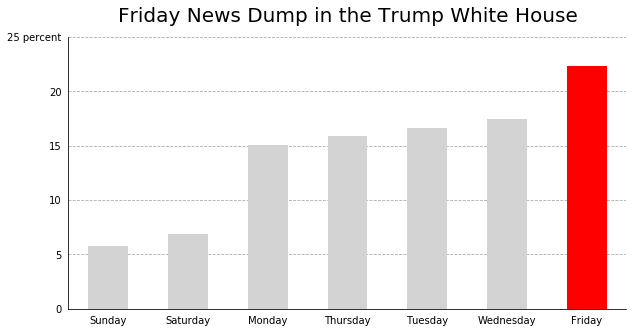

In [11]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

bar_colors = ["lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","lightgrey","red"]

ax = df_dt[df_dt.type == "STATEMENTS & RELEASES"].weekday.value_counts(normalize = True, ascending = True).plot(kind = "bar", color = bar_colors, rot=0, figsize = (10, 5))
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25])
ax.set_yticklabels([0, 5, 10, 15, 20, "25 percent"])
ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.set_title("Friday News Dump in the Trump White House", pad = 15)
ax.title.set_fontsize(20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("trump_news_dump.pdf")

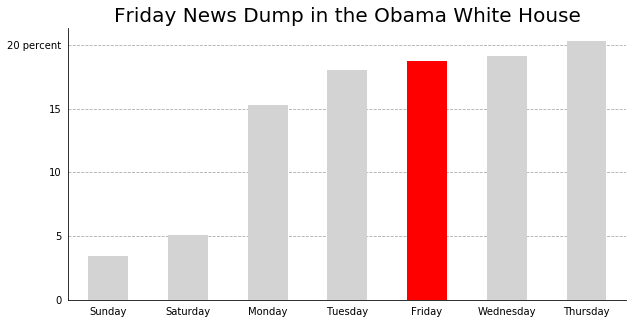

In [12]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

bar_colors = ["lightgrey","lightgrey","lightgrey","lightgrey","red", "lightgrey","lightgrey"]

ax = df_bo.weekday.value_counts(normalize = True, ascending = True).plot(kind = "bar", color = bar_colors, rot=0, figsize = (10, 5))
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels([0, 5, 10, 15, "20 percent"])
ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.set_title("Friday News Dump in the Obama White House")
ax.title.set_fontsize(20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("obama_news_dump.pdf")

# Question 1:
## So far I have ...

### 1. Scrape the press releases for the Obama White House and Trump White House
      - publish date
      - which day of the week
      - title
      - url
### 2. Get text for all the press releases, although the Obama White House one crashed my server ... and I didn't have enough time to analyze any texts

### 3. Did the most basic, most minimal data analysis, barely enough for me to make the graphs

# Question 2:

## I found that ...

### 1. Overall, the Trump Admin dumps news on Friday more often than the Obama admin, although it would be interesting to do year-by-year or even month-by-month comparison.

### Really, that's all I found for now

# Question 3:

## It would be nice to ...

### 1. Do more data analysis and some text analysis: Do some words appear more in Friday's press releases than other days? Was there a crazy week/month/period of time in Obama Admin (granted it was 8 years) that they dumped more news on Friday?

### 2. The websites of Clinton & Bush admins are also archived online, although they both are a MESS. I want to scrape those as well.
    links here:
        - Bush : https://georgewbush-whitehouse.archives.gov/news/
        - Clinton : https://clintonwhitehouse6.archives.gov/
            - btw the Clinton White House had six versions of their websites in the archive, SIX.

### 3. Make better charts, perhaps that one that allows a side-by-side comparison.

### 4. I really, really want to talk to someone who worked in the WH press office, or perhaps even someone in the press corps, to see if the data is significant.

# And that's what I had

# Here's the update
## -- .resample
## -- my attempts of text analysis
### -- all the ~fun~ stuff

In [13]:
df_bo.resample("M", on = "datetime").weekday.value_counts(normalize = True).unstack()

# wow
# it worked
# WOW

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
datetime,,,,,,,
2009-01-31,0.294118,NaN,0.058824,0.058824,0.147059,0.147059,0.294118
2009-02-28,0.268657,0.164179,0.029851,0.029851,0.179104,0.179104,0.149254
2009-03-31,0.131387,0.160584,0.036496,0.029197,0.211679,0.218978,0.211679
2009-04-30,0.145570,0.170886,0.012658,0.056962,0.278481,0.132911,0.202532
2009-05-31,0.268750,0.131250,0.050000,0.031250,0.143750,0.187500,0.187500
2009-06-30,0.205263,0.157895,0.031579,0.015789,0.178947,0.226316,0.184211
2009-07-31,0.201220,0.201220,0.018293,0.024390,0.219512,0.121951,0.213415
2009-08-31,0.233333,0.200000,0.022222,0.022222,0.177778,0.166667,0.177778
2009-09-30,0.180328,0.139344,0.024590,0.008197,0.245902,0.155738,0.245902


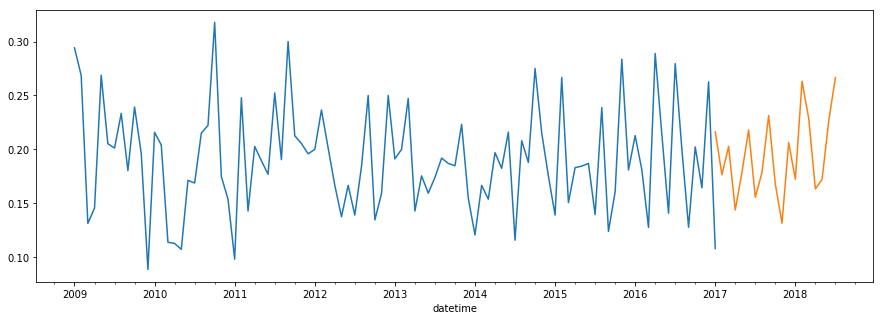

In [14]:
ax = df_bo.resample("M", on = "datetime").weekday.value_counts(normalize = True).unstack().Friday.plot(figsize = (15, 5))

df_dt.resample("M", on = "datetime").weekday.value_counts(normalize = True).unstack().Friday.plot(figsize = (15, 5), ax = ax)

# WOW

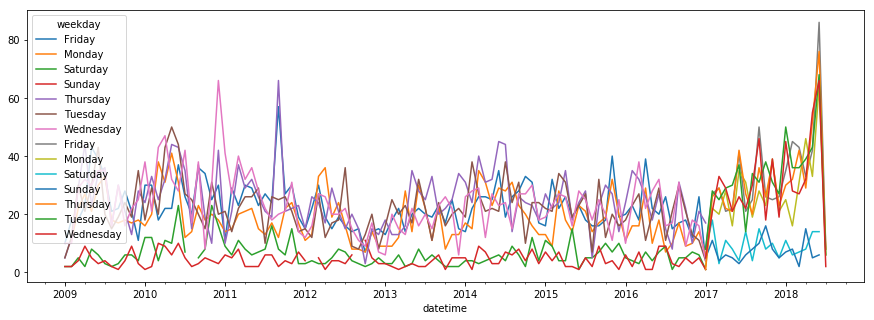

In [15]:
ax = df_bo.resample("M", on = "datetime").weekday.value_counts().unstack().plot(figsize = (15, 5))

df_dt.resample("M", on = "datetime").weekday.value_counts().unstack().plot(figsize = (15, 5), ax = ax)

# WOW okay this is a mess. sorry

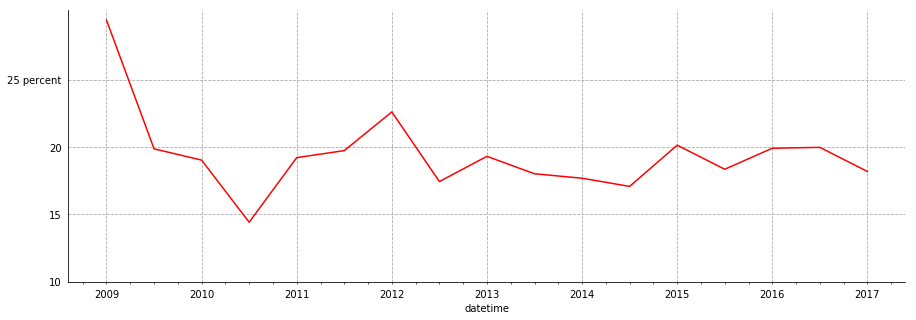

In [16]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

bar_colors = ["red", "lightgrey","lightgrey","lightgrey","lightgrey", "lightgrey","lightgrey"]

ax = df_bo.resample("6M", on = "datetime").weekday.value_counts(normalize = True).unstack().Friday.plot(color = bar_colors, figsize = (15, 5))

ax.grid(b = None, which = "major", color = "darkgrey", linestyle = "dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_yticks([0.10, 0.15, 0.20, 0.25])
ax.set_yticklabels([10, 15, 20, "25 percent"])

ax.set_xticks(["2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01", "2016-01-01", "2017-01-01"])
ax.set_xticklabels([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)



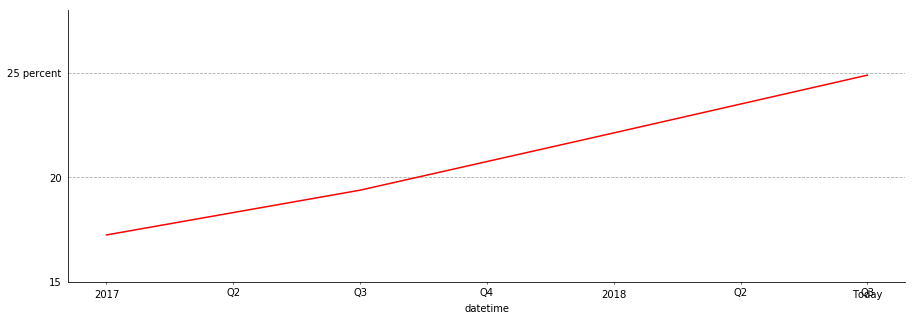

In [17]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

bar_colors = ["red", "lightgrey","lightgrey","lightgrey","lightgrey", "lightgrey","lightgrey"]

ax = df_dt[df_dt["type"] == "STATEMENTS & RELEASES"].resample("6M", on = "datetime").weekday.value_counts(normalize = True).unstack().Friday.plot(color = bar_colors, figsize = (15, 5))

ax.grid(b = None, which = "major",axis = "y", color = "darkgrey", linestyle = "dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_yticks([0.15, 0.20, 0.25])
ax.set_yticklabels([15, 20, "25 percent"])
ax.set_ylim(0.15, 0.28)

ax.set_xticks(["2017-01-01", "2018-01-01", "2018-07-12"])
ax.set_xticklabels([2017, 2018, "Today"])

ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)



## Look scary, no? This is not a fair comparison. Trump admin categorized their press releases so we can easily find the "statements & releases", aka the most important & newsworthy stuff

## Obama admin just put everything together. So let's be fair.

In [18]:
df_bo["title"].str.extract(r"([a-zA-Z]{1,}) ")[0].value_counts()

Statement           3098
President           2218
Readout             1752
FACT                 812
Presidential         601
Fact                 266
Vice                 241
Letter               199
Background           199
Message              170
White                156
Notice               143
Joint                139
Declaraciones        118
First                113
Remarks               68
Obama                 55
The                   53
n                     45
Nominations           42
MENSAJE               40
Upcoming              38
Jill                  36
Press                 36
Mensaje               31
We                    29
Presidente            27
United                27
ed                    26
Expected              26
Excerpts              25
out                   22
Ed                    21
Senator               21
s                     17
Record                16
HOJA                  15
Statements            15
Conference            14
El                    14


In [19]:
def no_fact_sheets_or_readouts(row):
    title_list = row["title"].split(" ")
    if title_list[0] == "FACT" or title_list[0] == "Fact" or title_list[0] == "Readout":
        does_this_count = "nah"
    else:
        does_this_count = "yes"
    return does_this_count

In [20]:
df_bo["does_this_count"] = df_bo.apply(no_fact_sheets_or_readouts, axis = 1)

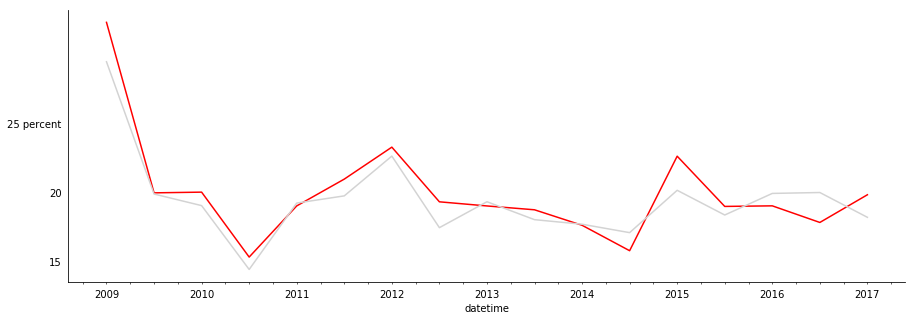

In [21]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

bar_colors = ["red", "lightgrey","lightgrey","lightgrey","lightgrey", "lightgrey","lightgrey"]

ax = df_bo[df_bo["does_this_count"] == "yes"].resample("6M", on = "datetime").weekday.value_counts(normalize = True).unstack().Friday.plot(color = bar_colors, figsize = (15, 5))

ax.grid(b = None, which = "major", color = "darkgrey", linestyle = "dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_yticks([0.10, 0.15, 0.20, 0.25])
ax.set_yticklabels([10, 15, 20, "25 percent"])

ax.set_xticks(["2009-01-01", "2010-01-01", "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01", "2016-01-01", "2017-01-01"])
ax.set_xticklabels([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

df_bo.resample("6M", on = "datetime").weekday.value_counts(normalize = True).unstack().Friday.plot(color = "lightgrey", figsize = (15, 5), ax = ax)

## Doesn't look that different, but its `somewhat` fair

In [22]:
df_bo_rs_w = df_bo[df_bo["does_this_count"] == "yes"].resample("W", on = "datetime").weekday.value_counts(normalize = True).unstack().reset_index()

In [23]:
df_bo_rs_m = df_bo[df_bo["does_this_count"] == "yes"].resample("M", on = "datetime").weekday.value_counts(normalize = True).unstack().reset_index()

In [24]:
def get_term_year_bo(row):
    year = int(str(row["datetime"] - pd.to_datetime("2009-01-20")).split(" ")[0])
    return year

In [25]:
df_bo_rs_w["in_office_for"] = df_bo_rs_w.apply(get_term_year_bo, axis = 1)
df_bo_rs_m["in_office_for"] = df_bo_rs_m.apply(get_term_year_bo, axis = 1)

In [26]:
df_dt_rs_w = df_dt[df_dt["type"] == "STATEMENTS & RELEASES"].resample("W", on = "datetime").weekday.value_counts(normalize = True).unstack().reset_index()

df_dt_rs_m = df_dt[df_dt["type"] == "STATEMENTS & RELEASES"].resample("M", on = "datetime").weekday.value_counts(normalize = True).unstack().reset_index()

In [27]:
def get_term_year_bo(row):
    year = int(str(row["datetime"] - pd.to_datetime("2009-01-20")).split(" ")[0])
    return year

def get_term_year_dt(row):
    year = int(str(row["datetime"] - pd.to_datetime("2017-01-20")).split(" ")[0])
    return year

In [28]:
df_dt_rs_w["in_office_for"] = df_dt_rs_w.apply(get_term_year_dt, axis = 1)
df_dt_rs_m["in_office_for"] = df_dt_rs_m.apply(get_term_year_dt, axis = 1)

In [57]:
df_dt_rs_w.shape

(77, 9)

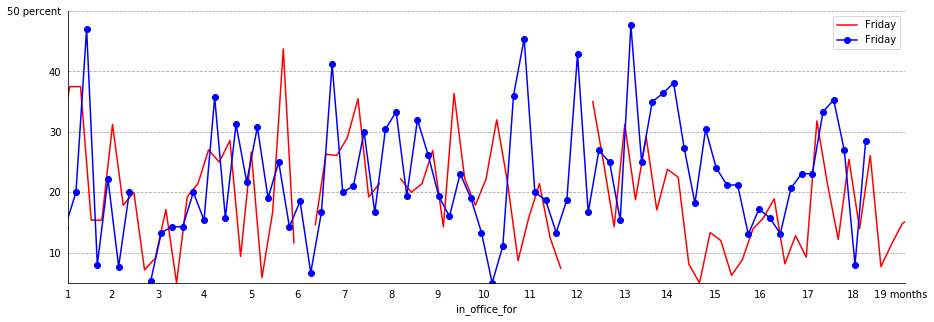

In [83]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

ax = df_bo_rs_w.plot(x = "in_office_for", y = "Friday", color = "red", figsize = (15, 5))
df_dt_rs_w.plot(x = "in_office_for", y = "Friday",marker = "o", color = "blue", figsize = (15,5), ax = ax)
ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_yticks([0.1, 0.2,0.3,0.4, 0.5])
ax.set_yticklabels([10, 20, 30, 40, "50 percent"])
ax.set_ylim(0.05, 0.5)

ax.set_xticks([11, 39, 70, 100, 131, 161, 192, 223, 253, 284, 314, 345, 376, 404, 435, 465, 496, 526, 557 ])
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, "19 months"])
ax.set_xlim(11, 560)
ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("weekly_comparison.pdf")

In [76]:
df_dt_rs_w.tail()

weekday,datetime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,in_office_for
72,2018-06-10,0.333333,0.185185,0.037037,0.037037,0.185185,0.111111,0.111111,506
73,2018-06-17,0.352941,0.294118,0.058824,NaN,NaN,0.176471,0.117647,513
74,2018-06-24,0.269231,0.115385,0.038462,0.038462,0.307692,0.115385,0.115385,520
75,2018-07-01,0.080000,0.240000,0.040000,NaN,0.240000,0.200000,0.200000,527
76,2018-07-08,0.285714,0.142857,NaN,NaN,0.428571,0.142857,NaN,534


In [74]:
## Here I want to just graph Trump's Friday news releases, then color them


## stole these colors from the upshot
## https://www.nytimes.com/interactive/2018/07/12/upshot/trade-war-cost-families.html?rref=collection%2Fsectioncollection%2Fupshot&action=click&contentCollection=upshot&region=rank&module=package&version=highlights&contentPlacement=2&pgtype=sectionfront

def get_color(friday):
    if friday > 0.4:
        return "#f67d68"
    elif friday > 0.2:
        return "#fda478"
    else:
        return "#fecb95"

bar_colors = [get_color(friday) for friday in df_dt_rs_w.Friday]


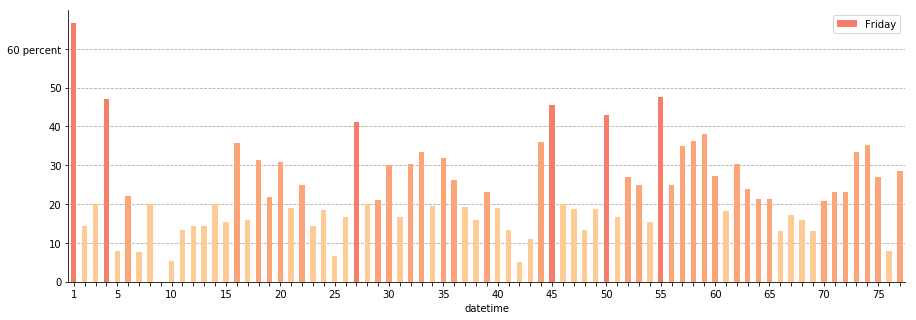

In [80]:

plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

ax = df_dt_rs_w.plot(x = "datetime", y = "Friday",color = bar_colors, kind = "bar", rot = 0, figsize = (15,5))

ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_yticks([0, 0.1, 0.2,0.3,0.4, 0.5,0.6])
ax.set_yticklabels([0, 10, 20, 30, 40, 50, "60 percent"])
ax.set_ylim(0, 0.7)

ax.set_xticklabels(["1", "", "", "", 5, "", "", "", "",10, "", "", "", "", 15, "", "", "", "",20, "", "", "", "", 25, "", "", "", "",30, "", "", "", "", 35, "", "", "", "", 40, "", "", "", "", 45, "", "", "", "", 50, "", "", "", "", 55, "", "", "", "", 60, "", "", "", "", 65, "", "", "", "", 70, "", "", "", "", 75, "", ""])
# ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("trump_weekly.pdf")

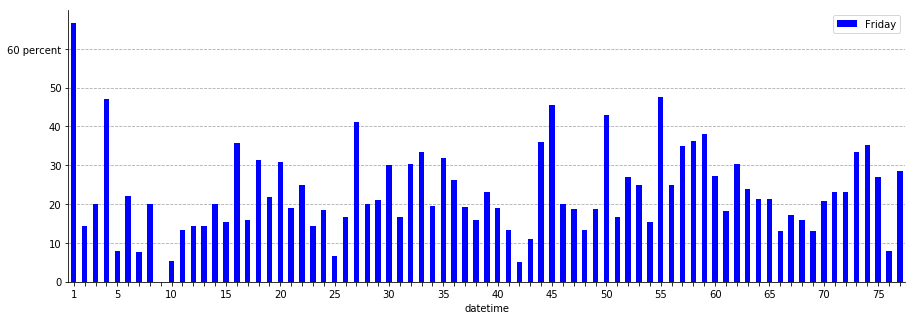

In [85]:

plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

ax = df_dt_rs_w.plot(x = "datetime", y = "Friday",color = "blue", kind = "bar", rot = 0, figsize = (15,5))

ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_yticks([0, 0.1, 0.2,0.3,0.4, 0.5,0.6])
ax.set_yticklabels([0, 10, 20, 30, 40, 50, "60 percent"])
ax.set_ylim(0, 0.7)

ax.set_xticklabels(["1", "", "", "", 5, "", "", "", "",10, "", "", "", "", 15, "", "", "", "",20, "", "", "", "", 25, "", "", "", "",30, "", "", "", "", 35, "", "", "", "", 40, "", "", "", "", 45, "", "", "", "", 50, "", "", "", "", 55, "", "", "", "", 60, "", "", "", "", 65, "", "", "", "", 70, "", "", "", "", 75, "", ""])
# ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("trump_weekly.pdf")

In [31]:
df_bo_rs_m

weekday,datetime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,in_office_for
0,2009-01-31,0.322581,NaN,0.064516,0.064516,0.129032,0.096774,0.322581,11
1,2009-02-28,0.263158,0.122807,0.035088,0.017544,0.210526,0.192982,0.157895,39
2,2009-03-31,0.117647,0.134454,0.033613,0.033613,0.235294,0.226891,0.218487,70
3,2009-04-30,0.150000,0.178571,0.007143,0.057143,0.271429,0.135714,0.200000,100
4,2009-05-31,0.278912,0.122449,0.040816,0.027211,0.149660,0.183673,0.197279,131
5,2009-06-30,0.196629,0.157303,0.033708,0.016854,0.191011,0.235955,0.168539,161
6,2009-07-31,0.212329,0.184932,0.006849,0.013699,0.239726,0.130137,0.212329,192
7,2009-08-31,0.226190,0.214286,0.023810,0.023810,0.190476,0.142857,0.178571,223
8,2009-09-30,0.200000,0.142857,0.019048,NaN,0.228571,0.161905,0.247619,253
9,2009-10-31,0.254717,0.150943,0.047170,0.028302,0.198113,0.188679,0.132075,284


In [32]:
df_dt_rs_m

weekday,datetime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,in_office_for
0,2017-01-31,0.172414,0.068966,0.206897,0.172414,0.034483,0.172414,0.172414,11
1,2017-02-28,0.225352,0.112676,0.169014,0.126761,0.140845,0.126761,0.098592,39
2,2017-03-31,0.102941,0.147059,0.014706,0.044118,0.220588,0.205882,0.264706,70
3,2017-04-30,0.159420,0.217391,0.086957,0.057971,0.144928,0.130435,0.202899,100
4,2017-05-31,0.240000,0.066667,0.093333,0.066667,0.120000,0.240000,0.173333,131
5,2017-06-30,0.220000,0.190000,0.030000,0.030000,0.150000,0.230000,0.150000,161
6,2017-07-31,0.197183,0.197183,0.084507,0.070423,0.197183,0.070423,0.183099,192
7,2017-08-31,0.217949,0.102564,0.051282,0.076923,0.128205,0.192308,0.230769,223
8,2017-09-30,0.278571,0.121429,0.078571,0.042857,0.128571,0.128571,0.221429,253
9,2017-10-31,0.156627,0.168675,0.084337,0.132530,0.132530,0.216867,0.108434,284


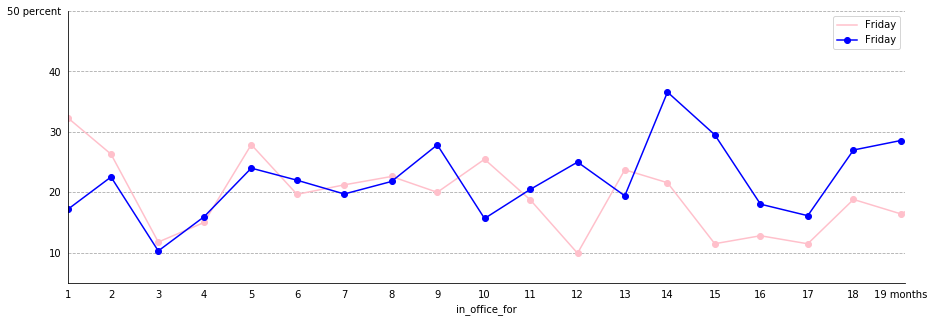

In [33]:
plt.rcParams.update({
    "pdf.fonttype" : 42,
    "ps.fonttype" : 42,
})

ax = df_bo_rs_m.plot(x = "in_office_for", y = "Friday",marker = "o", color = "pink", figsize = (15, 5))
df_dt_rs_m.plot(x = "in_office_for", y = "Friday",marker = "o", color = "blue", figsize = (15,5), ax = ax)
ax.grid(b = None, which = "major", axis = "y", color = "darkgrey", linestyle = "dashed")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_yticks([0.1, 0.2,0.3,0.4, 0.5])
ax.set_yticklabels([10, 20, 30, 40, "50 percent"])
ax.set_ylim(0.05, 0.5)

ax.set_xticks([11, 39, 70, 100, 131, 161, 192, 223, 253, 284, 314, 345, 376, 404, 435, 465, 496, 526, 557 ])
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, "19 months"])
ax.set_xlim(11, 560)
ax.tick_params(which = "major", left = False, bottom = False)
ax.set_axisbelow(True)

plt.savefig("monthly_comparison.pdf")

# That looks alright. I will use illustrator to clean it up and *maybe* add some text boxes

## BUT! First I want to clean this ↓

In [68]:
df_bo["content"][0]

"[[<p>\r\r\n\tWASHINGTON, DC – Today, President Barack Obama announced his intent to nominate the following individuals to key Administration posts:</p>, '\\n', <ul>\r\r\n<li>\r\r\n<strong>Todd Phillip Haskell </strong>– Ambassador to the Republic of the Congo, Department of State</li>\r\r\n<li>\r\r\n<strong>Jason E. Kearns</strong> – Member, U.S. International Trade Commission</li>\r\r\n</ul>, '\\n', <p>\r\r\n\tPresident Obama also announced his intent to appoint the following individuals to key Administration posts:</p>, '\\n', <ul>\r\r\n<li>\r\r\n<strong>Adrienne Harris</strong> – Member, Advisory Committee for Trade Policy and Negotiations</li>\r\r\n<li>\r\r\n<strong>Behnaz Kibria</strong> – Member, Advisory Committee for Trade Policy and Negotiations</li>\r\r\n<li>\r\r\n<strong>Jason Miller</strong> – Member, Advisory Committee for Trade Policy and Negotiations</li>\r\r\n<li>\r\r\n<strong>Brady Deaton</strong> – Member, Board for International Food and Agricultural Development</li

In [69]:
df_bo["content_1"] = df_bo["content"].str.replace("[", "")

In [70]:
df_bo["content_1"] = df_bo["content_1"].str.replace("]", "")

In [71]:
df_bo["content_1"] = df_bo["content_1"].str.replace("\\r", "")
df_bo["content_1"] = df_bo["content_1"].str.replace("\\n", "")
df_bo["content_1"] = df_bo["content_1"].str.replace("\\t", "")

## Full disclosure: I store the following code from the internet

### more specifically:
    https://sigdelta.com/blog/text-analysis-in-pandas/

In [72]:
df_bo["words"] = df_bo["content_1"].str.strip().str.split('[\W_]+')

In [74]:
rows = list()
for row in df_bo[["title", "datetime", "weekday", "words"]].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.title, r.datetime, r.weekday, word))

words = pd.DataFrame(rows, columns=["title", "datetime", "weekday", "words"])

,title,datetime,weekday,words
0,President Obama Announces More Key Administrat...,2017-01-16,Monday,
1,President Obama Announces More Key Administrat...,2017-01-16,Monday,p
2,President Obama Announces More Key Administrat...,2017-01-16,Monday,WASHINGTON
3,President Obama Announces More Key Administrat...,2017-01-16,Monday,DC
4,President Obama Announces More Key Administrat...,2017-01-16,Monday,Today


In [80]:
words_ob = words[words.words.str.len() > 0]

words_ob['words'] = words_ob.words.str.lower()

unimportant = ["the", "and", "to", "of", "in", "a", "n", "xa0", "p", "for", "strong", "s", "that", "li", "on", "br", "with", "is", "as", "u", "from", "by", "at", "this", "t", "div", "are", "be", "have", "has", "an", "td", "em", "de", "was", "or", "also", "its", "through", "than", "over", "ul", "000", "about", "href", "been", "style", "span", "1", "nowrap", "since"]

words_ob = words_ob[~words_ob["words"].isin(unimportant)]

,title,datetime,weekday,words
1,President Obama Announces More Key Administrat...,2017-01-16,Monday,p
2,President Obama Announces More Key Administrat...,2017-01-16,Monday,washington
3,President Obama Announces More Key Administrat...,2017-01-16,Monday,dc
4,President Obama Announces More Key Administrat...,2017-01-16,Monday,today
5,President Obama Announces More Key Administrat...,2017-01-16,Monday,president


In [81]:
words_ob.words.value_counts()

the                  943748
and                  646021
to                   556121
of                   550967
in                   321873
a                    309254
n                    258120
xa0                  233244
p                    217258
for                  216370
strong               205428
s                    165369
that                 154016
li                   139665
on                   134200
br                   121572
with                 109787
president            105118
is                   103601
as                    99058
will                  94582
u                     92738
from                  86087
we                    74862
by                    71393
at                    67374
this                  64320
states                60982
t                     60372
div                   60209
our                   60067
united                58436
are                   55920
be                    53283
have                  53077
has                 

## Now, get rid of prep., articles, html tags

In [83]:
unimportant = ["the", "and", "to", "of", "in", "a", "n", "xa0", "p", "for", "strong", "s", "that", "li", "on", "br", "with", "is", "as", "u", "from", "by", "at", "this", "t", "div", "are", "be", "have", "has", "an", "td", "em", "de", "was", "or", "also", "its", "through", "than", "over", "ul", "000", "about", "href", "been", "style", "span", "1", "nowrap", "since"]

In [85]:
words_ob = words_ob[~words_ob["words"].isin(unimportant)]

In [89]:
words_ob[words_ob.weekday == "Friday"].words.value_counts(normalize = True)*100

president            0.904769
will                 0.755105
we                   0.674470
states               0.484840
our                  0.482219
i                    0.481330
united               0.470519
their                0.398074
class                0.381554
new                  0.378325
national             0.362039
it                   0.335035
he                   0.332929
security             0.325020
more                 0.318235
state                0.310793
obama                0.303212
university           0.294507
width                0.278736
department           0.271763
his                  0.263901
para                 0.262356
support              0.256881
all                  0.246913
they                 0.243730
federal              0.242467
legacy               0.241671
top                  0.229597
administration       0.229503
these                0.224636
people               0.224121
including            0.221735
today                0.221267
which     

In [90]:
words_ob[words_ob.weekday != "Friday"].words.value_counts(normalize = True)*100

president              0.854903
will                   0.781775
we                     0.602423
states                 0.504481
our                    0.495921
united                 0.482158
new                    0.424985
their                  0.409488
i                      0.381884
class                  0.364623
more                   0.361693
national               0.343406
it                     0.318811
he                     0.313410
obama                  0.304221
security               0.286742
state                  0.270856
energy                 0.270408
his                    0.264448
support                0.258260
department             0.257323
para                   0.250546
federal                0.248464
they                   0.240611
all                    0.238458
administration         0.232140
health                 0.226429
university             0.224028
including              0.217022
today                  0.213604
these                  0.211939
legacy  